# Distribution for authors with at least 28 publications
#### (so  4607 authors, the 1.98% of the total data)
#### -> fitting Power law, Power law with exponential cut off and exponential 

In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit # The module that contains the curve_fit routine

import warnings
warnings.filterwarnings("ignore")

# Import own libraries 
import os, sys
script_path = os.path.realpath(os.path.dirname("10_on_trajectories"))
os.chdir(script_path)
sys.path.append("..")

from myLibraries.queries import * 
from myLibraries.rawData_queries import *
from myLibraries.events import *
from myLibraries.theoretical_functions import *
from myLibraries.utils import *

In [2]:
HOLE_SIZE = 28
ACTIVITY = 0
MIN_PUBS = 28

In [3]:
df = get_all_collabs()

df = df[df["2018"] != 0]
df = df[df["max_hole_size"] <= HOLE_SIZE]
df = df[df["activity"] >= ACTIVITY]
df = df[df["tot_pubs"] >= MIN_PUBS]

colls = df["2018"].values

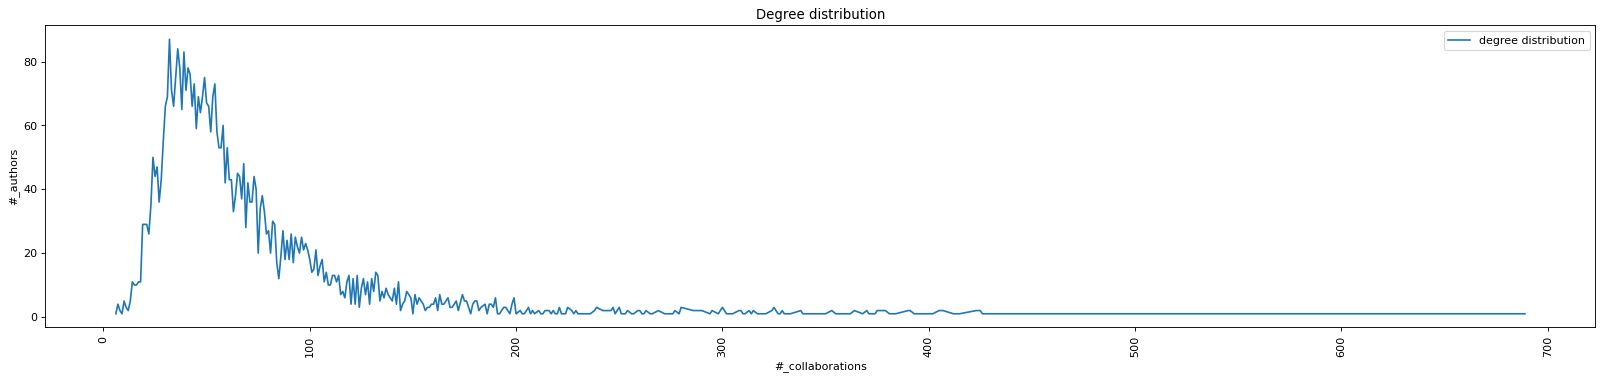

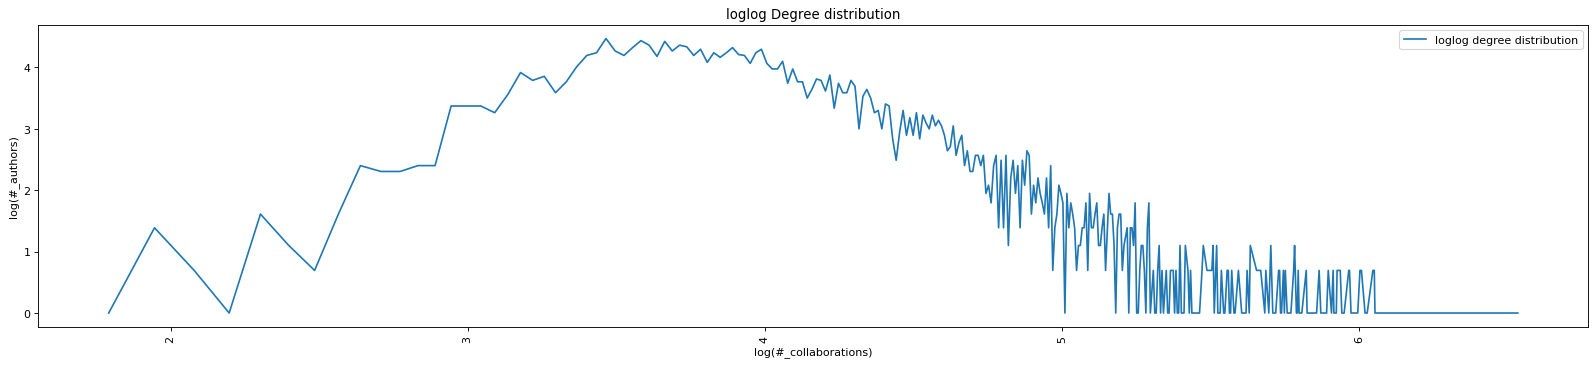

In [4]:
# DD

unique, counts = np.unique(colls, return_counts=True)
x, y = unique, counts  

draw("Degree distribution", "#_collaborations", "#_authors", x, [y], ["degree distribution"], 25, 5)
draw("loglog Degree distribution",  "log(#_collaborations)", "log(#_authors)", np.log(x), [np.log(y)], ["loglog degree distribution"], 25, 5)

# computing M_k with k>=18 to avoid the starting pike 

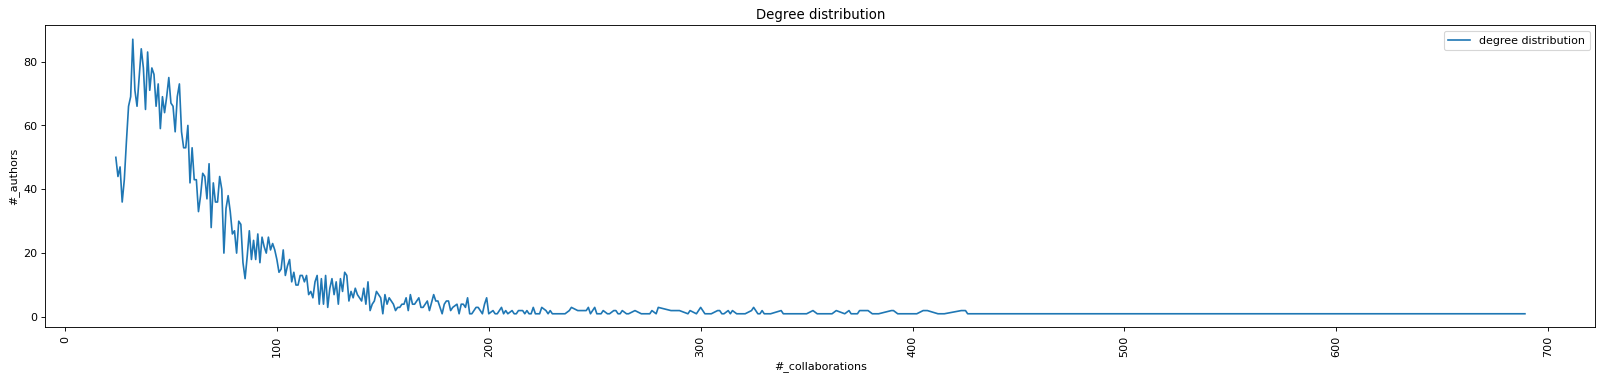

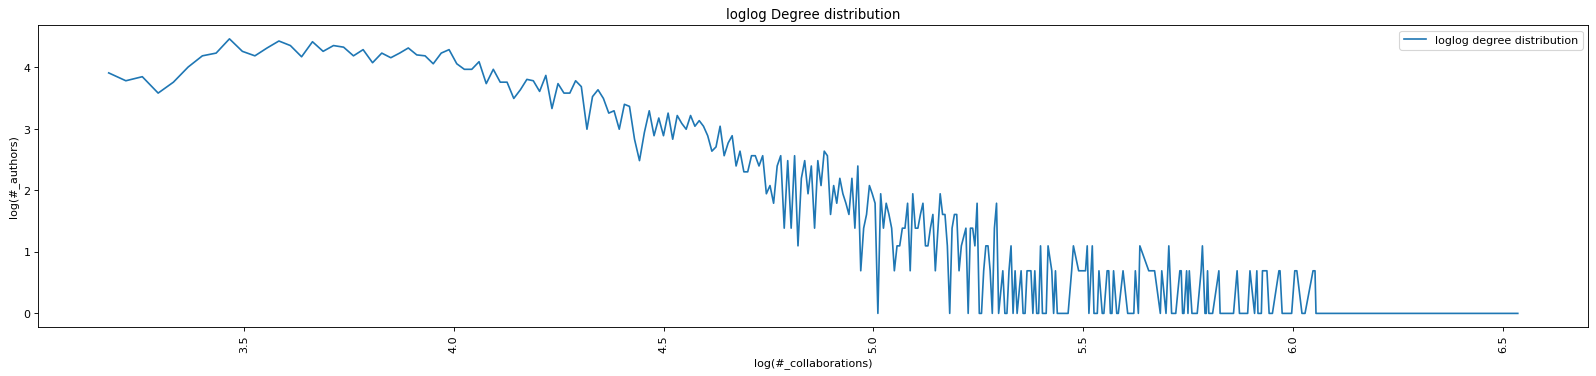

In [5]:
# DD
unique, counts = np.unique(colls, return_counts=True)
x, y = unique[18:], counts[18:]  


draw("Degree distribution", "#_collaborations", "#_authors", x, [y], ["degree distribution"], 25, 5)
draw("loglog Degree distribution",  "log(#_collaborations)", "log(#_authors)", np.log(x), [np.log(y)], ["loglog degree distribution"], 25, 5)

# Powerlaw fitting

In [6]:
# powerlaw 
def powerlaw(x,c, gamma):
    y = []
    for i in range(len(x)):
        y.append(c*pow(x[i], - gamma))
   
    return y

def fit_powerlaw(xdata, ydata):
    popt, pcov = curve_fit(powerlaw, xdata, ydata, bounds=([0,1], [np.inf, np.inf]))
    c = popt[0]
    gamma = popt[1]

    print('Power law fit with parameters -> c:', c, ', gamma:', gamma)
    
    return powerlaw(xdata, c, gamma), c, gamma

# powerlaw_exp_cutoff 
def powerlaw_exp_cutoff(x,c, gamma, sigma):
    y = []
    for i in range(len(x)):
        y.append(c*pow(x[i], - gamma) * pow(sigma, x[i]))
    return y

def fit_powerlaw_exp_cutoff(xdata, ydata):
    popt, pcov = curve_fit(powerlaw_exp_cutoff, xdata, ydata, bounds=([0, 1, 0], [np.inf, np.inf, 2]))
    c = popt[0]
    gamma = popt[1]
    sigma = popt[2]

    print('Power law with exponential cutoff fit with parameters -> c:', c, ', gamma:', gamma, ', sigma:', sigma)
    
    return powerlaw_exp_cutoff(xdata, c, gamma, sigma), c, gamma, sigma

# exponential 
def exponential(x, c, exp):
    y = []
    for i in range(len(x)):
        y.append(c*pow(exp, x[i]))
    return y

def fit_exponential(xdata, ydata):
    popt, pcov = curve_fit(exponential, xdata, ydata)
    c = popt[0]
    exp = popt[1]

    print('exponential fit with parameters -> a:', exp, 'c:', c)
    
    return exponential(xdata, c, exp), c, exp



Power law fit with parameters -> c: 3569.8648986672174 , gamma: 1.139224022981099
Power law with exponential cutoff fit with parameters -> c: 2578.8190693802435 , gamma: 1.0000000000000002 , sigma: 0.996432834541336
exponential fit with parameters -> a: 0.9819728290215829 c: 126.24833136118711


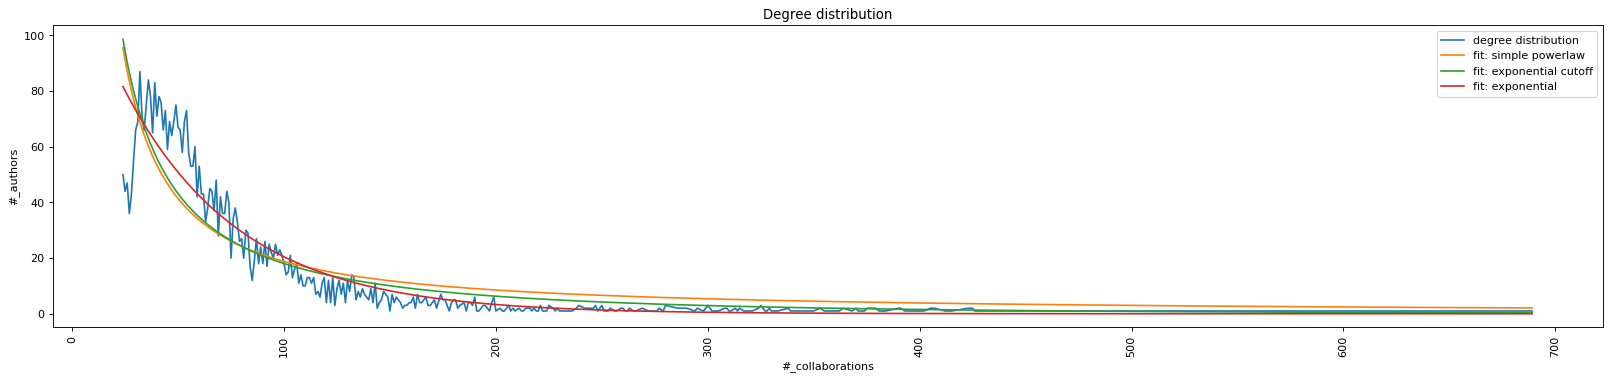

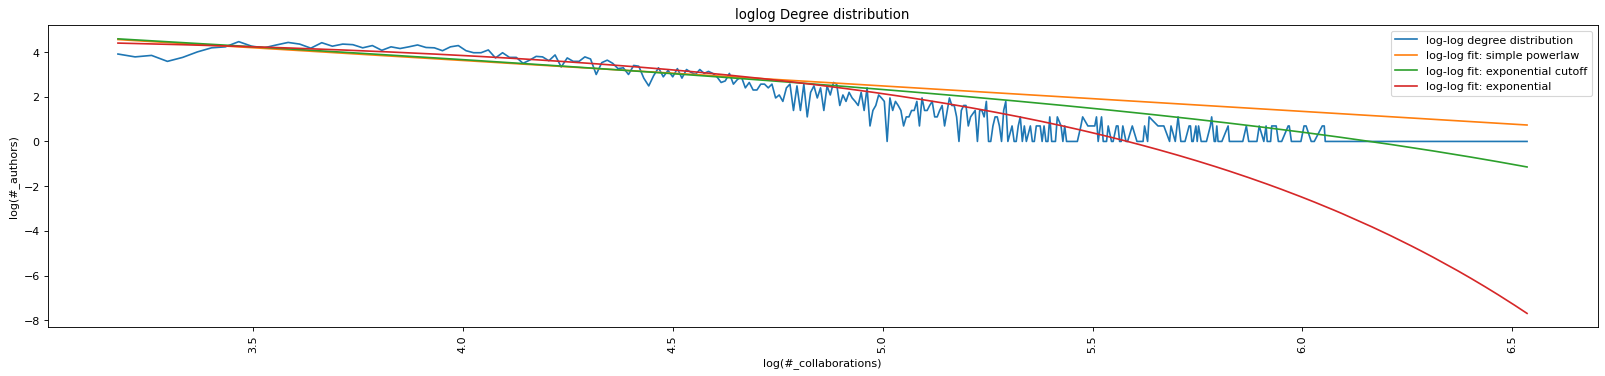

In [7]:
# fitting with power law and power law with exponential cutoff 
my_powerlaw_Fit = fit_powerlaw(x, y)[0]
my_powerlaw_cutoff_Fit = fit_powerlaw_exp_cutoff(x, y)[0]
exp_fit = fit_exponential(x, y)[0]

draw("Degree distribution",  "#_collaborations", "#_authors", x, [y, my_powerlaw_Fit, my_powerlaw_cutoff_Fit, exp_fit], ["degree distribution", "fit: simple powerlaw", "fit: exponential cutoff", "fit: exponential"], 25, 5)
draw("loglog Degree distribution",  "log(#_collaborations)", "log(#_authors)", np.log(x), [np.log(y), np.log(my_powerlaw_Fit), np.log(my_powerlaw_cutoff_Fit), np.log(exp_fit) ], ["log-log degree distribution", "log-log fit: simple powerlaw", "log-log fit: exponential cutoff", "log-log fit: exponential"], 25, 5)

# Errors

In [8]:
def err(y1,y2):
    err = 0
    for i in range(len(y1)):
        err += pow(abs(y1[i] - y2[i]), 2)
    return err

print("power law err:", err(my_powerlaw_Fit, y))
print("exp err:", err(exp_fit, y))
print("power law cutoff err:", err(my_powerlaw_cutoff_Fit, y))


power law err: 32811.87369651073
exp err: 15529.823903626886
power law cutoff err: 28668.291483290282


# Sliding starting k


starting x = 20 

Power law fit with parameters -> c: 5277.661785847868 , gamma: 1.2251768400266783
Power law with exponential cutoff fit with parameters -> c: 2888.7286662723086 , gamma: 1.0000000000000002 , sigma: 0.995432086739832
exponential fit with parameters -> a: 0.9809546506342942 c: 137.53652368287803

power law err: 27463.145411677346
exp err: 12892.871546703384
power law cutoff err: 22896.074127982265


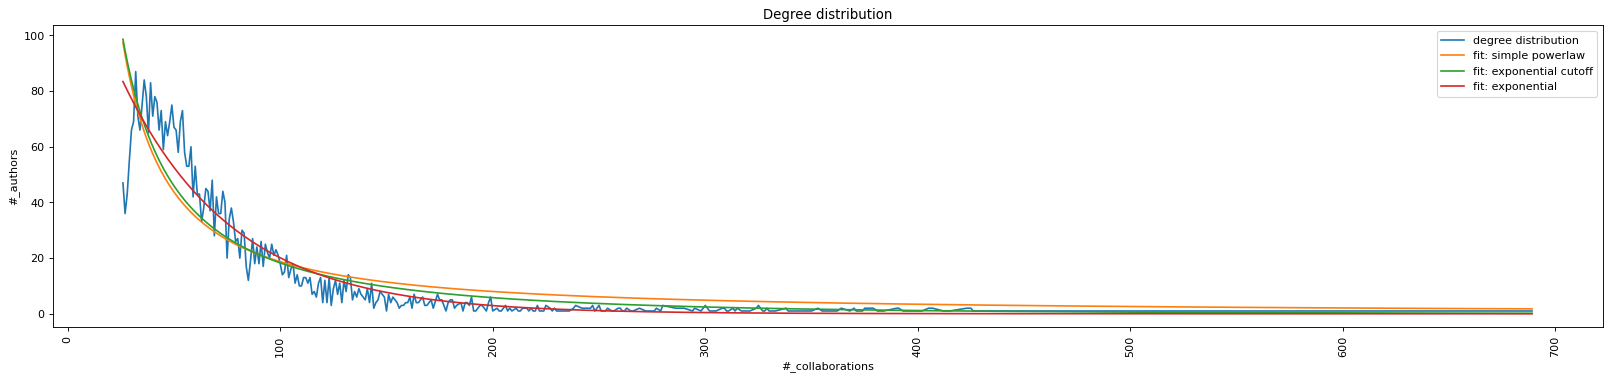

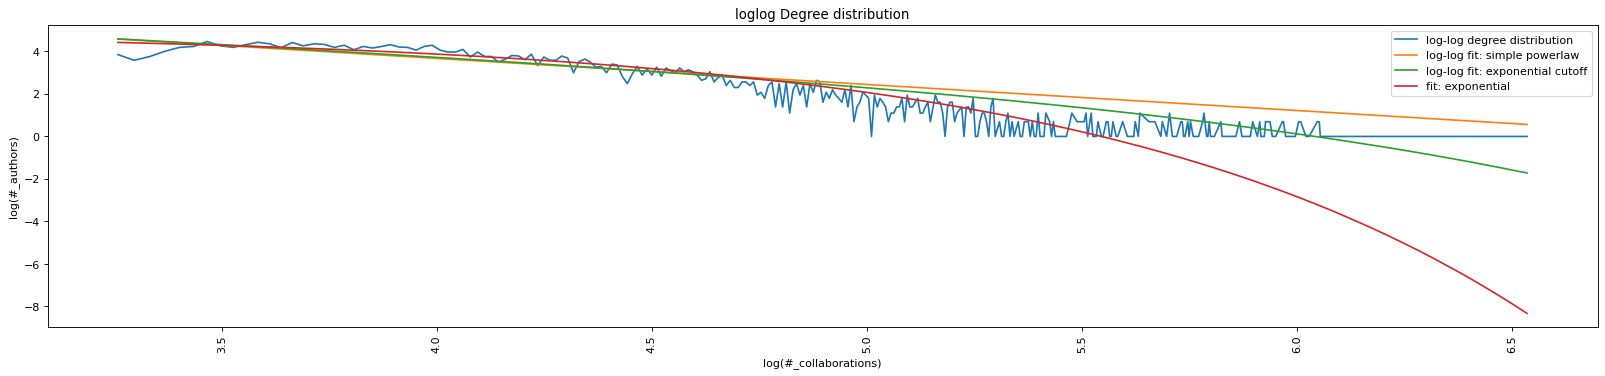




starting x = 30 

Power law fit with parameters -> c: 45625.716821229056 , gamma: 1.7109523142282717
Power law with exponential cutoff fit with parameters -> c: 4872.715071883236 , gamma: 1.000000000000002 , sigma: 0.9899260135020976
exponential fit with parameters -> a: 0.975787936049831 c: 207.0618975922119

power law err: 7082.223283295907
exp err: 3733.5778822769985
power law cutoff err: 4844.683546157896


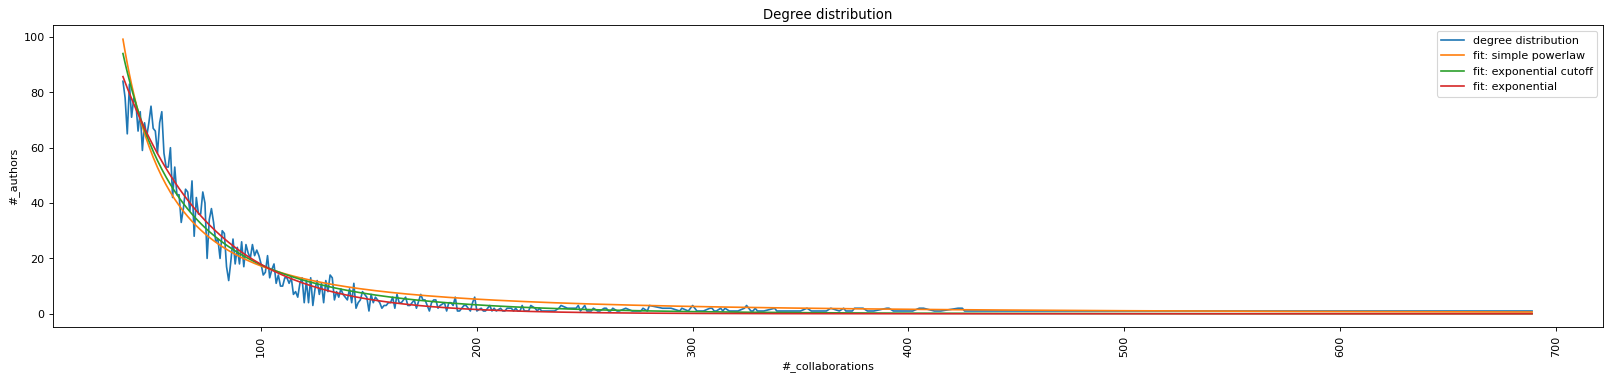

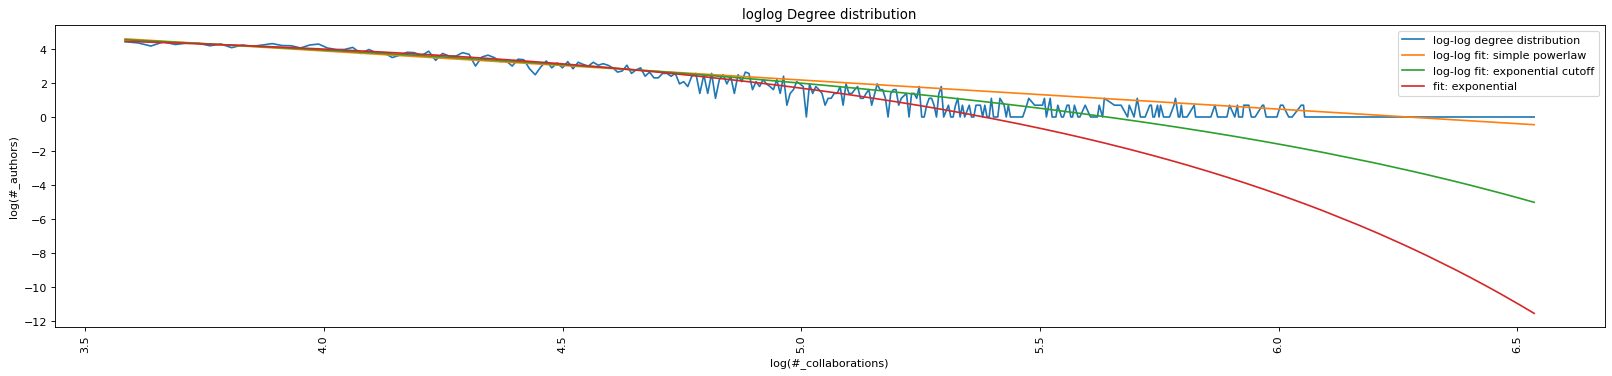




starting x = 40 

Power law fit with parameters -> c: 235186.45078841696 , gamma: 2.0810677623071423
Power law with exponential cutoff fit with parameters -> c: 6528.182308927715 , gamma: 1.0000000000000013 , sigma: 0.986603422175253
exponential fit with parameters -> a: 0.9737193882023224 c: 245.06014153060656

power law err: 3302.5430216993013
exp err: 2978.6612509412
power law cutoff err: 2834.455476195919


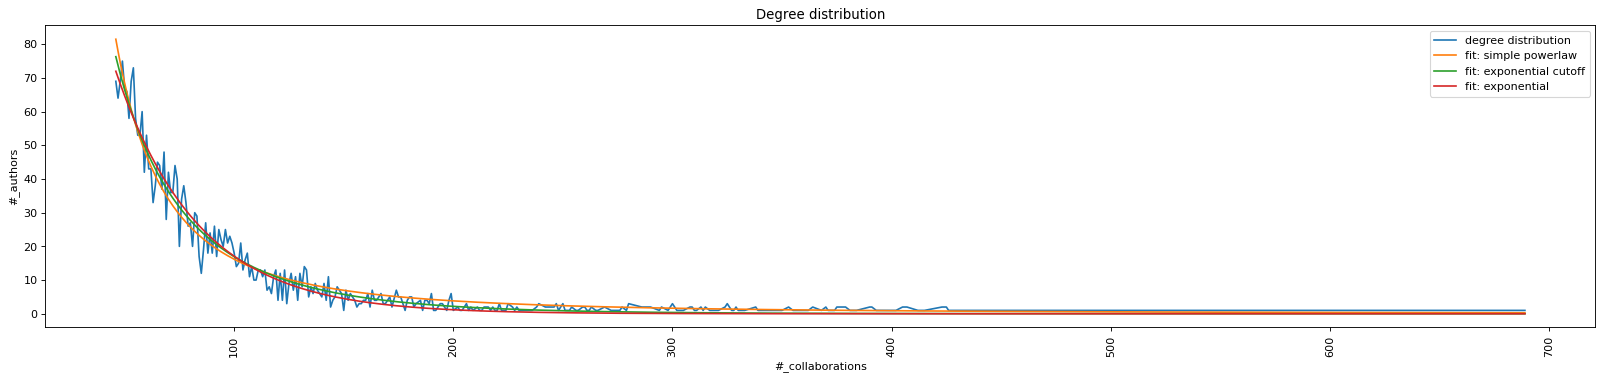

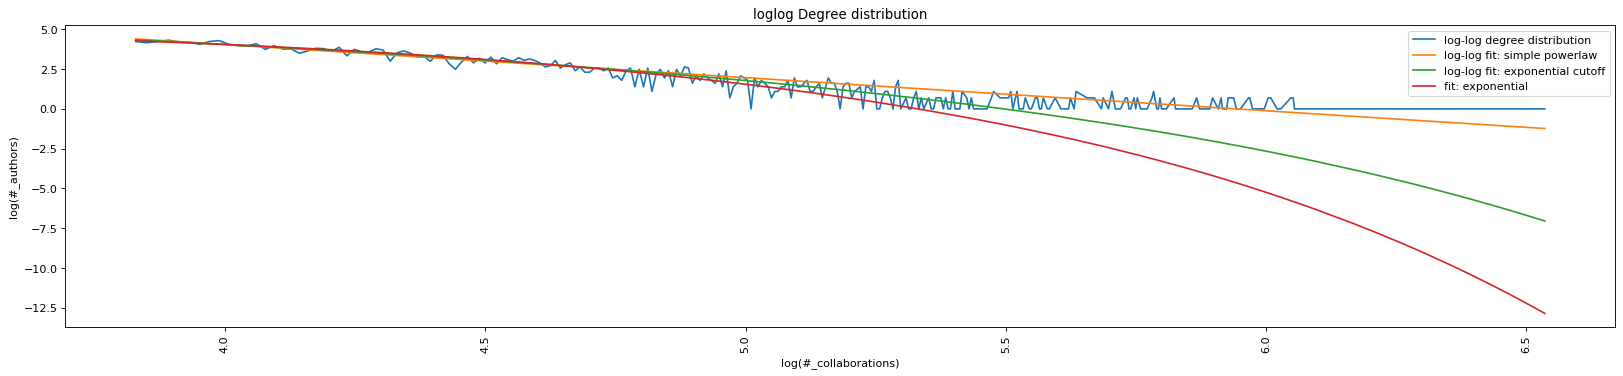




starting x = 50 

Power law fit with parameters -> c: 480775.9524680298 , gamma: 2.241486206779543
Power law with exponential cutoff fit with parameters -> c: 12705.900847706245 , gamma: 1.1939599641691965 , sigma: 0.9887035497846538
exponential fit with parameters -> a: 0.9753840443435677 c: 209.8553605188937

power law err: 2446.172727340168
exp err: 2427.3614254362706
power law cutoff err: 2324.8012678508717


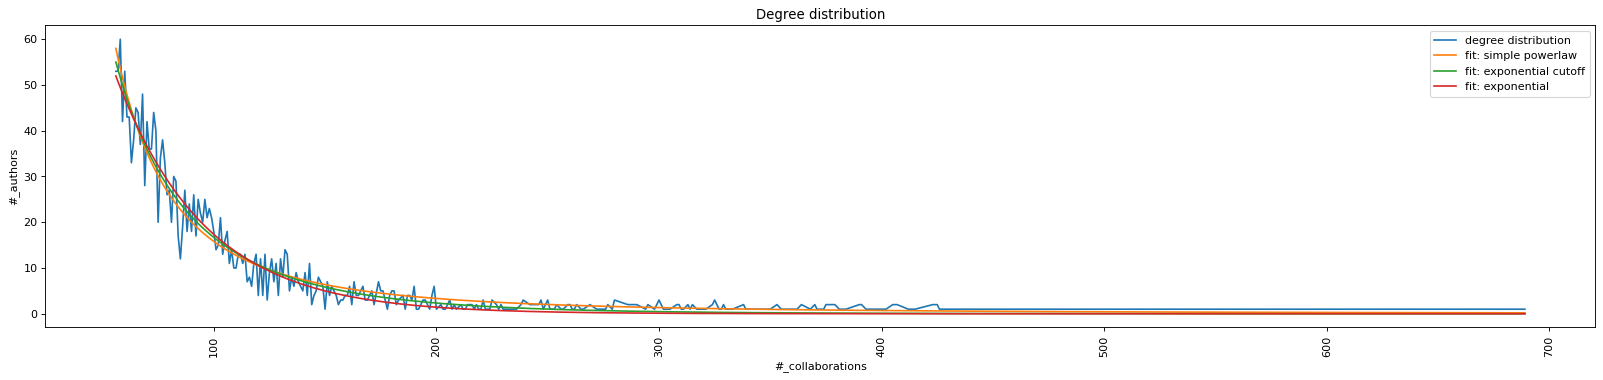

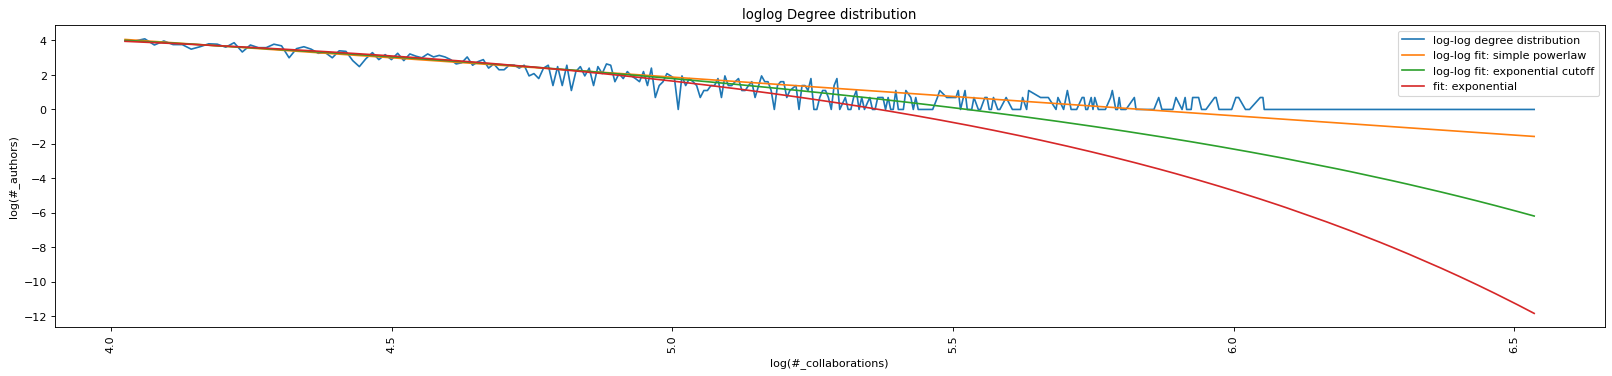




starting x = 60 

Power law fit with parameters -> c: 1402825.852898874 , gamma: 2.4722071642871906
Power law with exponential cutoff fit with parameters -> c: 1321537.7222865995 , gamma: 2.455648570967409 , sigma: 0.9998424959532942
exponential fit with parameters -> a: 0.9755255978258994 c: 207.59543484079813

power law err: 1888.7547842525446
exp err: 2077.108427991553
power law cutoff err: 1888.7391318092998


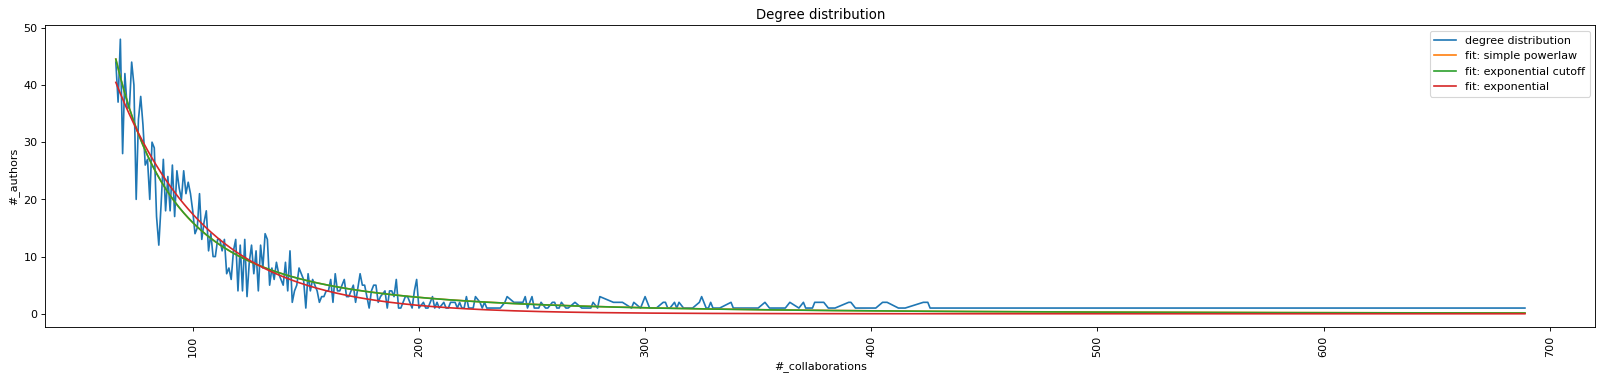

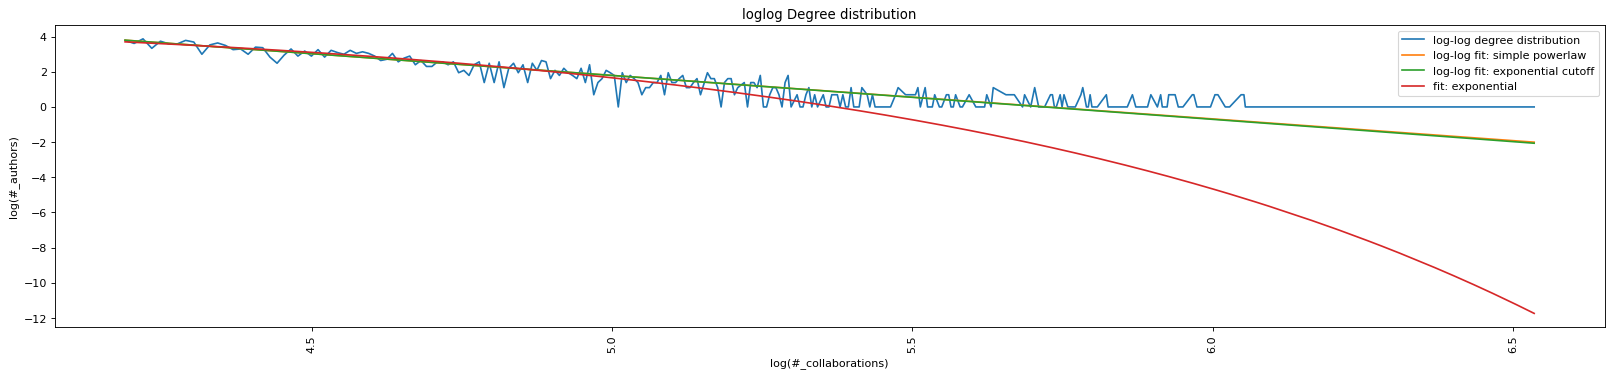




starting x = 70 

Power law fit with parameters -> c: 2113071.1413173196 , gamma: 2.559104950375776
Power law with exponential cutoff fit with parameters -> c: 17230371.188332833 , gamma: 3.1208018101538837 , sigma: 1.0047077486291278
exponential fit with parameters -> a: 0.9772524049495102 c: 171.23884744691472

power law err: 1360.2129161733567
exp err: 1514.714121727518
power law cutoff err: 1346.2116743110043


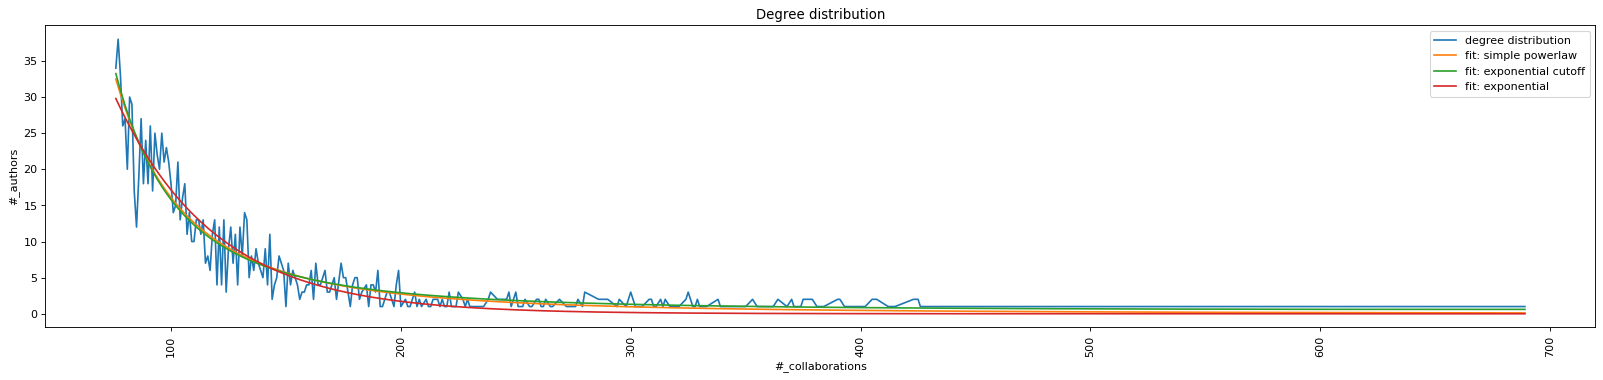

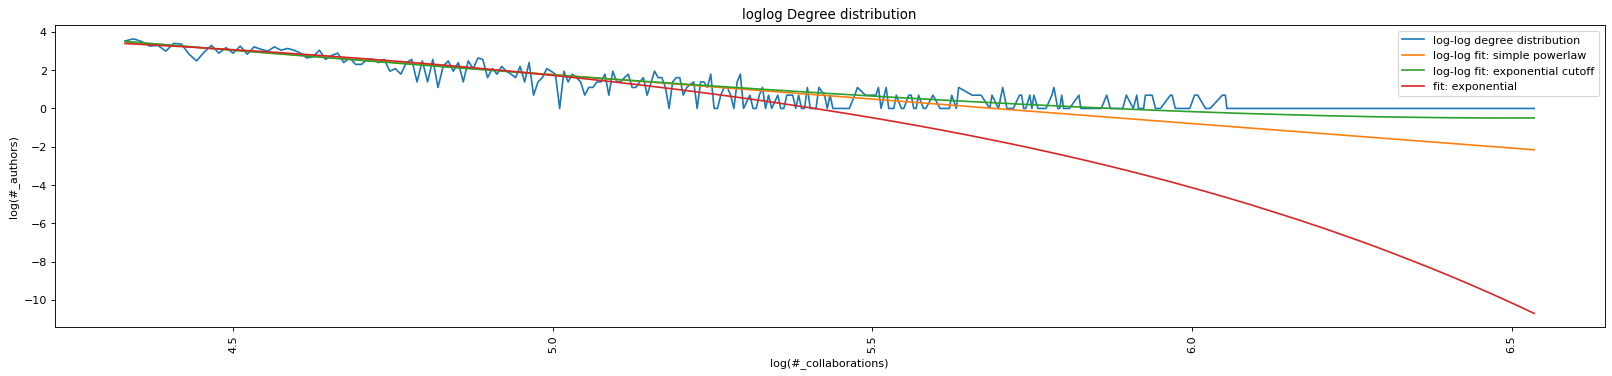




starting x = 80 

Power law fit with parameters -> c: 3997960.7814173633 , gamma: 2.6890692405568712
Power law with exponential cutoff fit with parameters -> c: 184448568.20680177 , gamma: 3.6874152603077928 , sigma: 1.00760896215663
exponential fit with parameters -> a: 0.9779334311832344 c: 159.00927066753317

power law err: 976.0795514982406
exp err: 1109.300170758834
power law cutoff err: 939.1112086901923


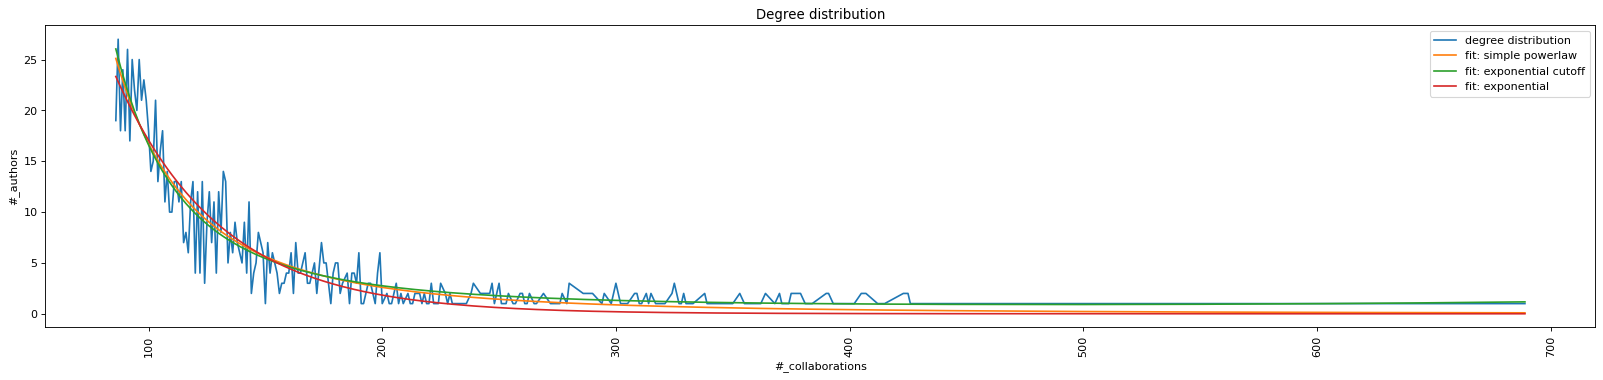

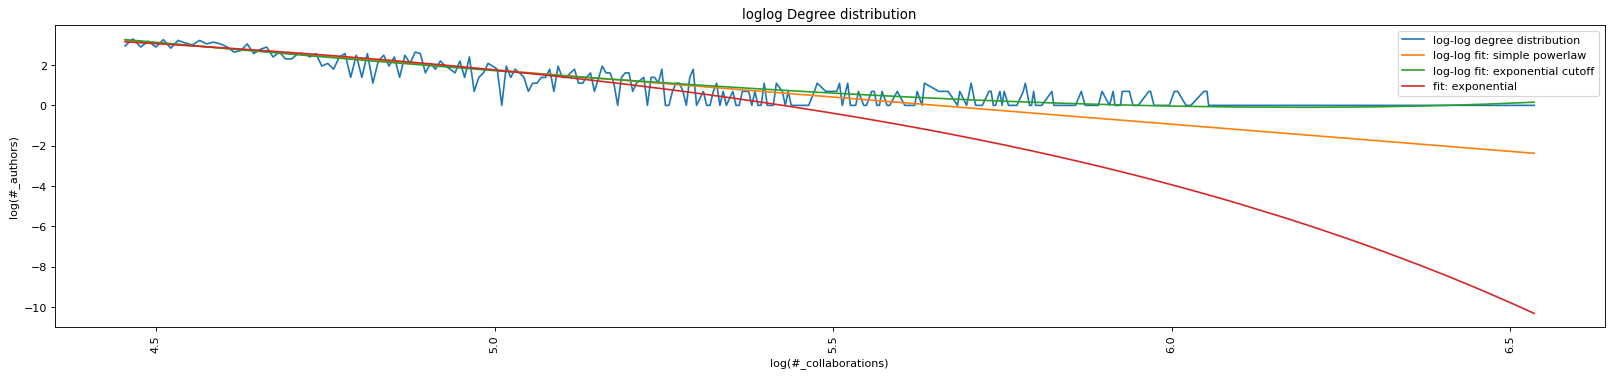




starting x = 90 

Power law fit with parameters -> c: 9550544.708312405 , gamma: 2.868297612197156
Power law with exponential cutoff fit with parameters -> c: 4873386000.453356 , gamma: 4.4493135746333 , sigma: 1.010885723522888
exponential fit with parameters -> a: 0.9784206931363175 c: 148.4900038976809

power law err: 808.6523576542496
exp err: 966.7718483350724
power law cutoff err: 723.955902473445


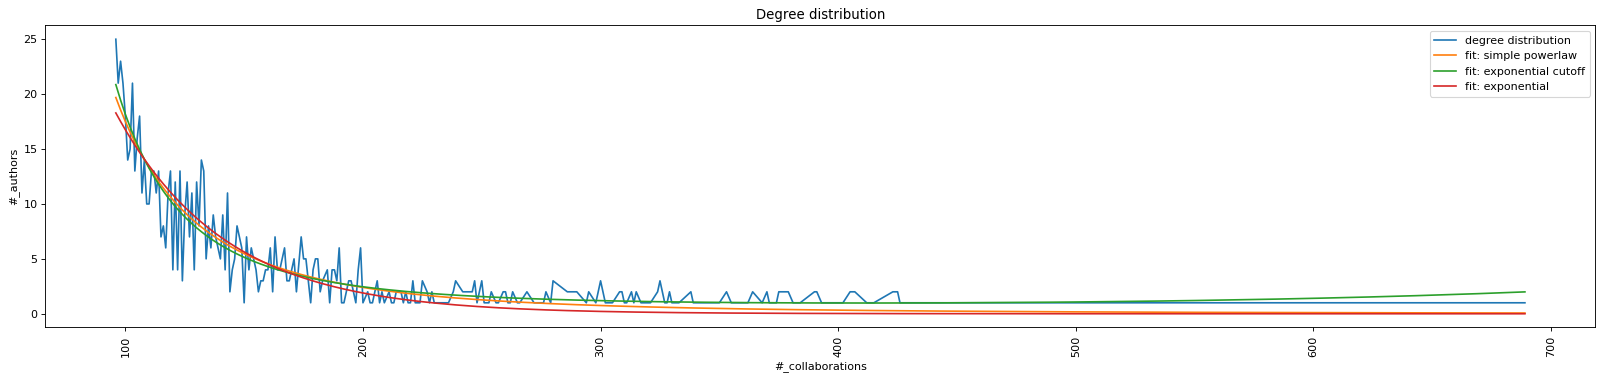

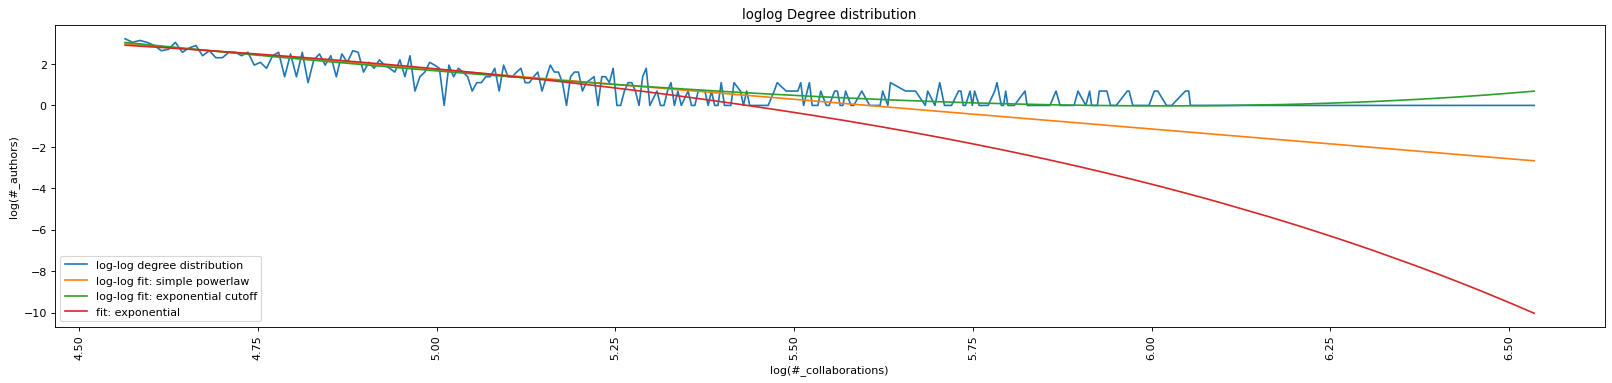




starting x = 100 

Power law fit with parameters -> c: 945614.4888647042 , gamma: 2.404091547601029
Power law with exponential cutoff fit with parameters -> c: 266785436.93929625 , gamma: 3.790658058259762 , sigma: 1.0083633265156564
exponential fit with parameters -> a: 0.9839843530854162 c: 65.96307081610546

power law err: 657.2952453753986
exp err: 731.6017453422169
power law cutoff err: 621.9695358448585


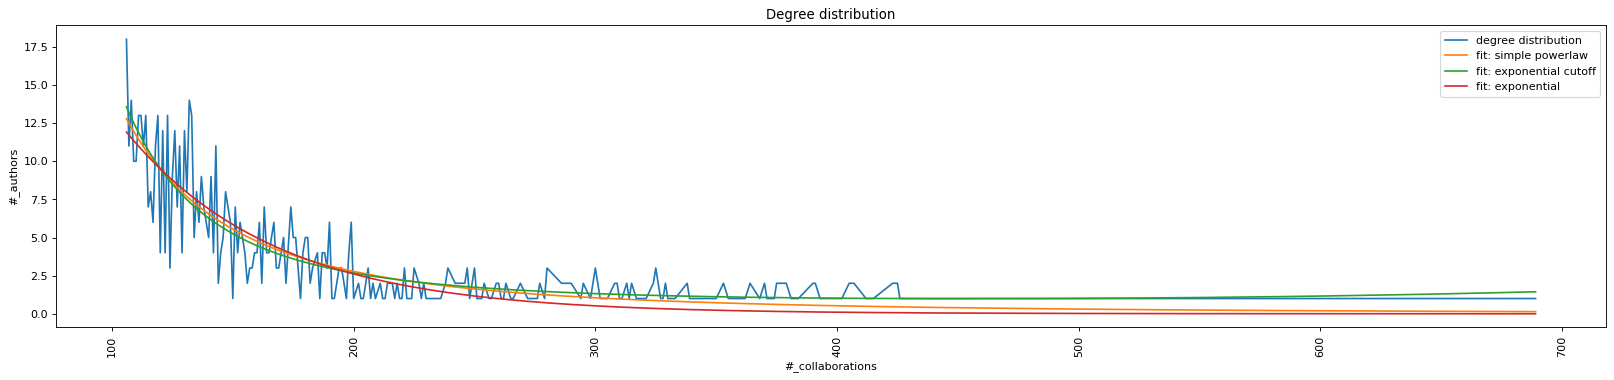

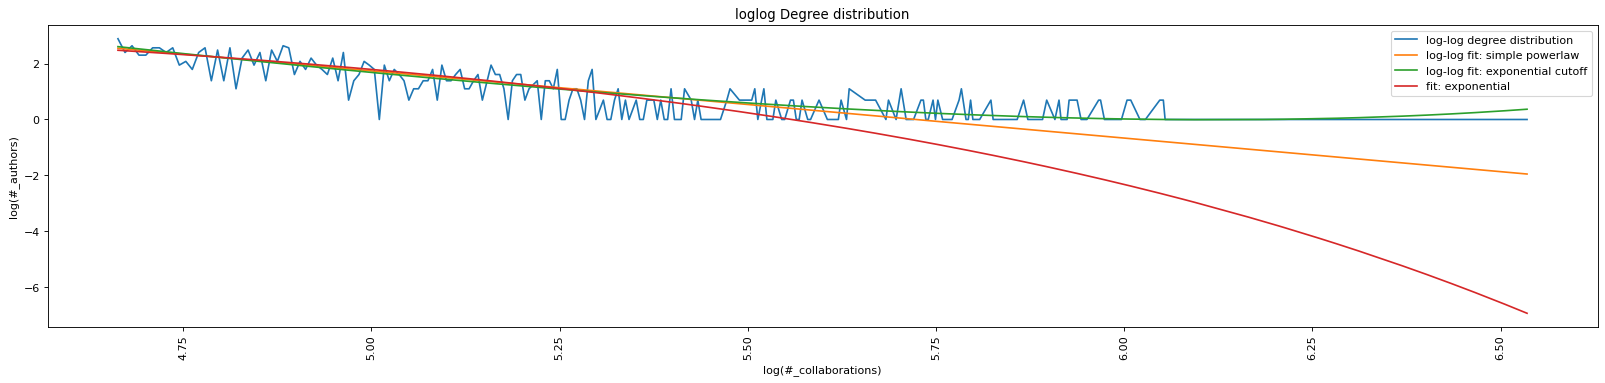

In [9]:
results = pd.DataFrame()

pl_errs = []
cutoff_errs = []
exp_errs = []
start_xs = [20, 30, 40, 50, 60, 70, 80, 90, 100]

for i in start_xs:
    
    print()
    print("starting x =",i, "\n")
    x, y = unique[i:], counts[i:]  
    my_powerlaw_Fit = fit_powerlaw(x, y)[0]
    my_powerlaw_cutoff_Fit = fit_powerlaw_exp_cutoff(x, y)[0]
    exp_fit = fit_exponential(x, y)[0]
    print()
    
    err_pl =  err(my_powerlaw_Fit, y)
    err_exp = err(exp_fit, y)
    err_cutoff = err(my_powerlaw_cutoff_Fit, y)
    
    pl_errs.append(err_pl)
    cutoff_errs.append(err_cutoff)
    exp_errs.append(err_exp)
    
    print("power law err:", err(my_powerlaw_Fit, y))
    print("exp err:", err(exp_fit, y))
    print("power law cutoff err:", err(my_powerlaw_cutoff_Fit, y))
    
    draw("Degree distribution",
         "#_collaborations", "#_authors",
         x,
         [y, my_powerlaw_Fit, my_powerlaw_cutoff_Fit, exp_fit], 
         ["degree distribution", "fit: simple powerlaw", "fit: exponential cutoff", "fit: exponential"],
         25, 5)
    
    
    draw("loglog Degree distribution",  
         "log(#_collaborations)", 
         "log(#_authors)", 
         np.log(x), 
         [np.log(y), np.log(my_powerlaw_Fit), np.log(my_powerlaw_cutoff_Fit), np.log(exp_fit)],
         ["log-log degree distribution", "log-log fit: simple powerlaw", "log-log fit: exponential cutoff", "fit: exponential"], 25, 5)
        
    print("\n==============================\n")
    
results["start_x"] = start_xs
results["Power law err"] = pl_errs
results["Power law with cutoff err"] = cutoff_errs
results["Exponential err"] = exp_errs

    

In [10]:
results

,start_x,Power law err,Power law with cutoff err,Exponential err
0,20,27463.145412,22896.074128,12892.871547
1,30,7082.223283,4844.683546,3733.577882
2,40,3302.543022,2834.455476,2978.661251
3,50,2446.172727,2324.801268,2427.361425
4,60,1888.754784,1888.739132,2077.108428
5,70,1360.212916,1346.211674,1514.714122
6,80,976.079551,939.111209,1109.300171
7,90,808.652358,723.955902,966.771848
8,100,657.295245,621.969536,731.601745
